# Random Over-sampling

[Machine Learning with Imbalanced Data - Course](https://www.trainindata.com/p/machine-learning-with-imbalanced-data)

Random over-sampling consists in extracting at random samples from the minority class, until they reach a certain proportion compared to the majority class, typically 50:50, or in other words, a balancing ratio of 1.

In Random over-sampling, we extract samples from the minority class at random, with replacement.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import RandomOverSampler

## Create data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

We will create 2 classes, one majority one minority, clearly separated to facilitate the demonstration.

In [2]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

In [3]:
X.head()

,VarA,VarB
0,-0.169565,-0.065470
2,-0.343164,-2.549262
4,-0.188721,-0.899346
5,0.516396,2.399387
6,0.020236,0.287303


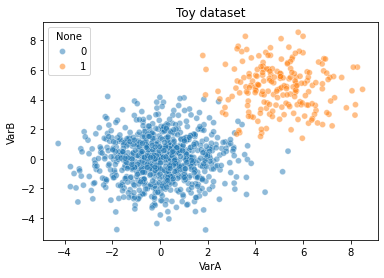

In [4]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## Random Over-sampling

[RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)


Selects samples from the minority class at random, with replacement, until we have as many observations as those in the majority class (or any other balancing ratio we wish).

In [5]:
ros = RandomOverSampler(
    sampling_strategy='auto', # samples only the minority class
    random_state=0,  # for reproducibility
)  

X_res, y_res = ros.fit_resample(X, y)

In [6]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# size of undersampled data

X_res.shape, y_res.shape

((1600, 2), (1600,))

In [8]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 Name: count, dtype: int64,
 0    800
 1    800
 Name: count, dtype: int64)

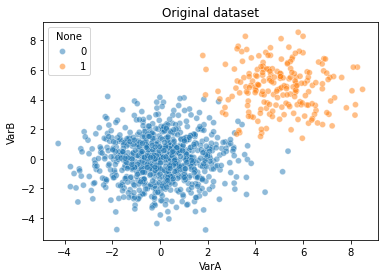

In [9]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

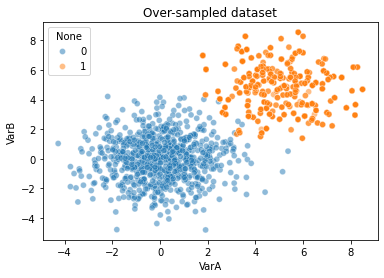

In [10]:
# plot of resampled data

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

The reason why we do not see as if there were more observations from the minority, is because they are identical to the other ones, so they are plotted on top. We notice there are more, because the orange colour is darker.

**HOMEWORK**

- Test Random Over-sampling in one of the datasets from imbalanced-learn and make some plots of variables highlighting the minority class to play and visualize the outcome better. 

- Change the parameter strategy in the current notebook to attain different proportions of minority class.

# Multiclass

## Create data

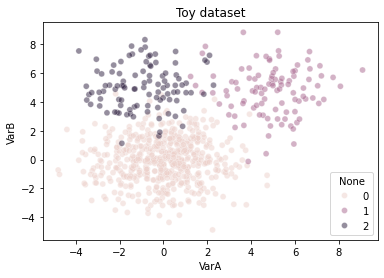

In [11]:
# Create some toy data

# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5), [-1, 5]]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std,
)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(100, random_state=42),
    X[y == 2].sample(100, random_state=42)
], axis=0)

y = y.loc[X.index]

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

In [12]:
y.value_counts()

0    534
1    100
2    100
Name: count, dtype: int64

## Oversampling

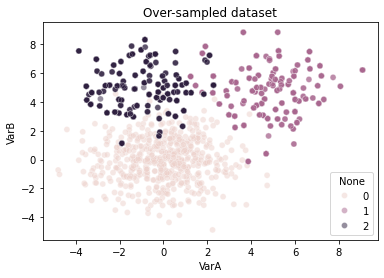

In [13]:
# option 1: oversample all but majority class

ros = RandomOverSampler(
    sampling_strategy='not majority', # samples all but majority class
    random_state=0,  # for reproducibility
)  

X_res, y_res = ros.fit_resample(X, y)

# plot of resampled data

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

In [14]:
y_res.value_counts()

0    534
1    534
2    534
Name: count, dtype: int64

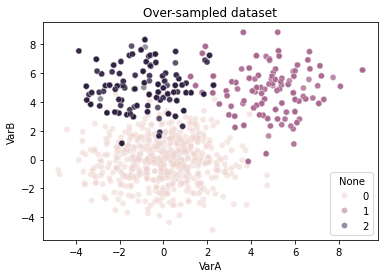

In [15]:
# option 2: specify which classes to oversample

ros = RandomOverSampler(
    sampling_strategy={1:500, 2:500}, # we specify what to oversample
    random_state=0,  # for reproducibility
)  

X_res, y_res = ros.fit_resample(X, y)

# plot of resampled data

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

In [16]:
y_res.value_counts()

0    534
1    500
2    500
Name: count, dtype: int64